In [ ]:
# Data Loader
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
from pytorch_lightning.utilities.types import EVAL_DATALOADERS, TRAIN_DATALOADERS
import pytorch_lightning as pl
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm import tqdm
from torch.utils.data import random_split
import json
from CustomDataset import * 
import sys
sys.path.append('../')
from config import *
from file_helper import *

def collate_fn(batch):
    return tuple(zip(*batch))
#=================================
#             Augmentation
#=================================

def gauss_noise_tensor(img):
    rand = torch.rand(1)[0]
    if rand < 0.5 and Horizon_AUG:
        sigma = rand *0.125
        out = img + sigma * torch.randn_like(img)
        return out
    return img

def blank(img):    
    return img

class CustomDataModule(pl.LightningDataModule):
    def __init__(self ,
                 train_dir ,
                 test_dir , batch_size = 2, num_workers = 0 , img_size=[IMG_WIDTH, IMG_HEIGHT] , use_aug = True ,padding_count = 24 ,c =0.1
                   ):
        super().__init__()
        self.train_dir = train_dir
        self.test_dir = test_dir
        
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.img_size = img_size      
        self.use_aug = use_aug
        self.padding_count  = padding_count
        self.c = c
        

        pass

    def prepare_data(self) -> None:
        # Download dataset
        pass

    def setup(self, stage):
        # Create dataset...          
                
        self.entire_dataset = CustomDataset(self.train_dir  , use_aug= self.use_aug , padding_count= self.padding_count , c=self.c)
        self.train_ds , self.val_ds = random_split(self.entire_dataset , [0.9, 0.1])        
        self.test_ds = CustomDataset(self.test_dir  , use_aug= False)
        
        pass

    # ToDo: Reture Dataloader...
    def train_dataloader(self) -> TRAIN_DATALOADERS:
        return DataLoader(self.train_ds , batch_size= self.batch_size , num_workers= self.num_workers , shuffle=True)
    
    def val_dataloader(self) -> EVAL_DATALOADERS:
        return DataLoader(self.val_ds , batch_size= self.batch_size , num_workers= self.num_workers , shuffle=False)
    
    def test_dataloader(self) -> EVAL_DATALOADERS:
        return DataLoader(self.test_ds , batch_size= self.batch_size , num_workers= self.num_workers , shuffle=False)

    pass


# Test
dm = CustomDataModule ( train_dir= f"../anno/test_visiable_10_no_cross.json" ,
                       test_dir= f"../anno/test_visiable_10_no_cross.json" , padding_count=256
                       )

In [ ]:
from torch import Tensor
def unpad_data( x :[Tensor] ) :
	non_zero_indices = torch.nonzero(x)
	#print(non_zero_indices)
	# Get the non-zero values
	non_zero_values = x[non_zero_indices[:,0], non_zero_indices[:,1]]

	unique = torch.unique(non_zero_indices[:,0] ,return_counts=True)	
	non_zero_values = torch.split(non_zero_values , tuple(unique[1]))
	
	return non_zero_values

cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])


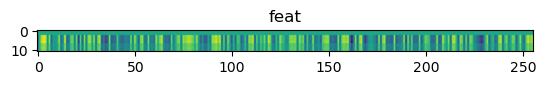

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.3655, 0.8320, 0.5488, 0.5542, 0.1095, 0.8735],
        [1.1914, 1.6289, 0.7690, 0.4539, 0.1058, 0.8794]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1493, 0.3349, 0.7973, 0.2632, 0.3426, 0.7886],
        [0.6557, 0.3235, 0.8131, 0.7732, 0.3373, 0.7983]], device='cuda:0')
L1 loss tensor(0.3406, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1212, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.3684, 0.8438, 0.5503, 0.5566, 0.1157, 0.8726]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.5182, 0.4623, 0.5875, 0.5325, 0.4611, 0.5903]], device='cuda:0')
L1 loss tensor(0.2034, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0720, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.3411, 0.8218, 0.5635, 0.5581, 0.0944, 0.8931]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2245, 0.2741, 0.7487, 0.7194, 0.2171, 0.8048]], device='cuda:0')
L1 loss tensor(0.2037, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0721, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.9087,  1.3643,  0.3721,  0.1082, -0.0666,  0.9082],
        [ 0.3320,  0.8257,  0.5703,  0.5576,  0.0991,  0.9023],
        [ 1.1641,  1.6143,  0.7881,  0.4675,  0.0964,  0.9180]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1683, 0.4644, 0.5880, 0.1853, 0.4603, 0.5979],
        [0.2933, 0.4422, 0.6301, 0.3231, 0.4424, 0.6298],
        [0.4349, 0.2799, 0.8403, 0.5767, 0.2306, 0.8782]], device='cuda:0')
L1 loss tensor(0.3612, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.2167, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.3389, 0.8257, 0.5664, 0.5547, 0.0999, 0.8979]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.0992, 0.2652, 0.8614, 0.2375, 0.2747, 0.8539]], device='cuda:0')
L1 loss tensor(0.2719, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0718, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[0.0452, 0.8540, 0.5356, 0.7656, 0.1372, 0.7109]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3680, 0.2880, 0.8495, 0.5285, 0.2962, 0.8426]], device='cuda:0')
L1 loss tensor(0.2884, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0717, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.0281, 0.8428, 0.5522, 0.7651, 0.1298, 0.7305]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4044, 0.2272, 0.8878, 0.5827, 0.2491, 0.8729]], device='cuda:0')
L1 loss tensor(0.2953, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0717, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.0397, 0.8467, 0.5449, 0.7637, 0.1356, 0.7188],
        [0.9624, 1.5996, 0.8657, 0.7188, 0.1554, 0.7837]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4204, 0.3814, 0.7442, 0.4958, 0.3936, 0.7253],
        [0.7810, 0.3339, 0.8079, 0.9365, 0.2692, 0.8660]], device='cuda:0')
L1 loss tensor(0.2914, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1183, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.0845, 0.8467, 0.5205, 0.7563, 0.1465, 0.6860]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4840, 0.3223, 0.8129, 0.5891, 0.3601, 0.7693]], device='cuda:0')
L1 loss tensor(0.2801, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0734, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.0416, 0.8525, 0.5420, 0.7646, 0.1393, 0.7163]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1958, 0.2334, 0.8761, 0.3895, 0.2266, 0.8808]], device='cuda:0')
L1 loss tensor(0.2891, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0718, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[0.0891, 0.6069, 0.7676, 0.6992, 0.3572, 0.8770],
        [0.9526, 1.3799, 1.0566, 0.8135, 0.3596, 0.8960]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3826, 0.1989, 0.8989, 0.6217, 0.1895, 0.9046],
        [0.7501, 0.4075, 0.6955, 0.7948, 0.4097, 0.6915]], device='cuda:0')
L1 loss tensor(0.2429, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1177, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.0907, 0.6060, 0.7632, 0.6973, 0.3574, 0.8721],
        [0.9546, 1.3809, 1.0537, 0.8101, 0.3596, 0.8911]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1490, 0.3818, 0.7947, 0.1808, 0.3270, 0.7947],
        [0.4750, 0.2943, 0.8376, 0.5285, 0.3651, 0.7605]], device='cuda:0')
L1 loss tensor(0.2615, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1176, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.1086, 0.6152, 0.7520, 0.6978, 0.3650, 0.8564],
        [0.9697, 1.3945, 1.0410, 0.8042, 0.3645, 0.8691]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3734, 0.4525, 0.6094, 0.3908, 0.4459, 0.6241],
        [0.7547, 0.4627, 0.5916, 0.8132, 0.4636, 0.5896]], device='cuda:0')
L1 loss tensor(0.2645, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1179, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[  0.8120,   1.2109,   0.6299,   0.2544,   0.1438,   0.8828],
        [  0.0719,   0.6094,   0.7754,   0.6997,   0.3574,   0.8911],
        [  0.9375,   1.3779,   1.0635,   0.8193,   0.3606,   0.9141],
        [-12.7500,   9.9609,   7.4023,  -3.9199,   1.1787,  41.5312]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.5016, 0.4353, 0.6492, 0.5340, 0.4272, 0.6657],
        [0.4439, 0.4301, 0.6548, 0.4709, 0.4383, 0.6383],
        [0.6360, 0.4125, 0.6761, 0.6746, 0.4190, 0.6647],
        [0.2345, 0.4434, 0.6372, 0.2667, 0.4343, 0.6569]], device='cuda:0')
L1 loss tensor(3.3913, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(1.2155, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.1211, 0.6162, 0.7441, 0.6948, 0.3684, 0.8477]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4027, 0.2897, 0.8449, 0.5696, 0.2832, 0.8504]], device='cuda:0')
L1 loss tensor(0.1537, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0699, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
cls_token torch.Size([3, 3, 256])
patcher torch.Size([3, 8, 256])
patcher + token torch.Size([3, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([3, 11, 256])
encoder torch.Size([3, 11, 256])
pred box tensor([[0.2542, 0.1899, 0.9590, 0.5127, 0.5454, 0.9941]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2281, 0.2236, 0.9058, 0.5764, 0.1084, 0.9589]], device='cuda:0')
L1 loss tensor(0.1081, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0713, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2461, 0.1870, 0.9673, 0.5122, 0.5439, 1.0059]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1301, 0.2241, 0.8883, 0.3297, 0.2114, 0.8963]], device='cuda:0')
L1 loss tensor(0.1428, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0711, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2402, 0.1880, 0.9717, 0.5142, 0.5425, 1.0117]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4022, 0.2485, 0.8723, 0.5710, 0.2421, 0.8768]], device='cuda:0')
L1 loss tensor(0.1357, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1059, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
cls_token torch.Size([5, 3, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[0.8457, 0.7461, 0.7231, 0.1552, 0.3684, 0.7461],
        [0.2073, 0.0584, 0.9014, 0.4753, 0.4993, 0.8408],
        [0.7178, 0.7324, 1.0059, 0.8726, 0.7388, 0.6992]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1683, 0.4644, 0.5880, 0.1853, 0.4603, 0.5979],
        [0.4349, 0.2799, 0.8403, 0.5767, 0.2306, 0.8782],
        [0.2933, 0.4422, 0.6301, 0.3231, 0.4424, 0.6298]], device='cuda:0')
L1 loss tensor(0.2450, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.2953, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.8589, 0.7500, 0.7153, 0.1494, 0.3745, 0.7314],
        [0.2189, 0.0620, 0.8940, 0.4736, 0.5029, 0.8296]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1490, 0.3818, 0.7947, 0.1808, 0.3270, 0.7947],
        [0.4750, 0.2943, 0.8376, 0.5285, 0.3651, 0.7605]], device='cuda:0')
L1 loss tensor(0.1755, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1906, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2281, 0.0645, 0.8857, 0.4741, 0.5034, 0.8208]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2281, 0.2236, 0.9058, 0.5764, 0.1084, 0.9589]], device='cuda:0')
L1 loss tensor(0.1358, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0673, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2162, 0.0550, 0.8936, 0.4763, 0.4949, 0.8311]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2245, 0.2741, 0.7487, 0.7194, 0.2171, 0.8048]], device='cuda:0')
L1 loss tensor(0.1532, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0674, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2229, 0.0702, 0.8872, 0.4771, 0.5049, 0.8242]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3680, 0.2880, 0.8495, 0.5285, 0.2962, 0.8426]], device='cuda:0')
L1 loss tensor(0.1132, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0668, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[0.2852, 0.0861, 0.7280, 0.5894, 0.2898, 0.6392]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4840, 0.3223, 0.8129, 0.5891, 0.3601, 0.7693]], device='cuda:0')
L1 loss tensor(0.1201, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0649, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[  0.7876,   0.6929,   0.6338,   0.2822,   0.2634,   0.6128],
        [  0.2223,   0.0865,   0.7642,   0.6006,   0.2788,   0.6875],
        [  0.5571,   0.6030,   0.8428,   1.0322,   0.6943,   0.5474],
        [ -4.6992,  -7.9688,  -2.0859,  12.3047, -12.7031,  39.2500]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4439, 0.4301, 0.6548, 0.4709, 0.4383, 0.6383],
        [0.5016, 0.4353, 0.6492, 0.5340, 0.4272, 0.6657],
        [0.6360, 0.4125, 0.6761, 0.6746, 0.4190, 0.6647],
        [0.2345, 0.4434, 0.6372, 0.2667, 0.4343, 0.6569]], device='cuda:0')
L1 loss tensor(3.4652, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(1.7995, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2386, 0.0841, 0.7554, 0.5972, 0.2793, 0.6719],
        [0.5723, 0.6060, 0.8359, 1.0254, 0.6938, 0.5288]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4204, 0.3814, 0.7442, 0.4958, 0.3936, 0.7253],
        [0.7810, 0.3339, 0.8079, 0.9365, 0.2692, 0.8660]], device='cuda:0')
L1 loss tensor(0.1766, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1159, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2266, 0.0800, 0.7637, 0.5996, 0.2739, 0.6841]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4044, 0.2272, 0.8878, 0.5827, 0.2491, 0.8729]], device='cuda:0')
L1 loss tensor(0.1133, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0670, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2389, 0.0853, 0.7563, 0.5986, 0.2795, 0.6729],
        [0.5723, 0.6064, 0.8364, 1.0273, 0.6938, 0.5308]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3826, 0.1989, 0.8989, 0.6217, 0.1895, 0.9046],
        [0.7501, 0.4075, 0.6955, 0.7948, 0.4097, 0.6915]], device='cuda:0')
L1 loss tensor(0.1617, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1160, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[0.5264, 0.1980, 0.7339, 0.5205, 0.0637, 0.7041]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.5182, 0.4623, 0.5875, 0.5325, 0.4611, 0.5903]], device='cuda:0')
L1 loss tensor(0.1570, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0619, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.5181, 0.1913, 0.7349, 0.5200, 0.0579, 0.7061],
        [0.6616, 0.4568, 0.6992, 0.9546, 0.5806, 0.5737]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3734, 0.4525, 0.6094, 0.3908, 0.4459, 0.6241],
        [0.7547, 0.4627, 0.5916, 0.8132, 0.4636, 0.5896]], device='cuda:0')
L1 loss tensor(0.1343, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1170, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.5234, 0.1879, 0.7324, 0.5190, 0.0580, 0.7036],
        [0.6660, 0.4541, 0.6963, 0.9521, 0.5811, 0.5708]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1493, 0.3349, 0.7973, 0.2632, 0.3426, 0.7886],
        [0.6557, 0.3235, 0.8131, 0.7732, 0.3373, 0.7983]], device='cuda:0')
L1 loss tensor(0.1766, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1167, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.4934, 0.1851, 0.7524, 0.5225, 0.0483, 0.7275]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4022, 0.2485, 0.8723, 0.5710, 0.2421, 0.8768]], device='cuda:0')
L1 loss tensor(0.1110, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0616, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.4998, 0.1882, 0.7471, 0.5215, 0.0537, 0.7212]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1958, 0.2334, 0.8761, 0.3895, 0.2266, 0.8808]], device='cuda:0')
L1 loss tensor(0.1571, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0617, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([3, 3, 256])
patcher torch.Size([3, 8, 256])
patcher + token torch.Size([3, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([3, 11, 256])
encoder torch.Size([3, 11, 256])
pred box tensor([[0.5347, 0.4683, 0.7588, 0.4202, 0.0137, 0.7788]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4027, 0.2897, 0.8449, 0.5696, 0.2832, 0.8504]], device='cuda:0')
L1 loss tensor(0.1478, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0602, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.4990,  0.4575,  0.7822,  0.4229, -0.0027,  0.8101]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.0992, 0.2652, 0.8614, 0.2375, 0.2747, 0.8539]], device='cuda:0')
L1 loss tensor(0.1963, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0598, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 5.0244e-01,  4.5947e-01,  7.7881e-01,  4.2236e-01, -3.6621e-04,
          8.0420e-01]], device='cuda:0', dtype=torch.float16,
       grad_fn=<IndexBackward0>)
gt box tensor([[0.1301, 0.2241, 0.8883, 0.3297, 0.2114, 0.8963]], device='cuda:0')
L1 loss tensor(0.1856, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0598, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
cls_token torch.Size([5, 3, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[0.3091, 0.5005, 1.0088, 0.2144, 0.1616, 1.1045],
        [0.3840, 0.2325, 0.6816, 0.6040, 0.5654, 1.0127]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.7810, 0.3339, 0.8079, 0.9365, 0.2692, 0.8660],
        [0.4204, 0.3814, 0.7442, 0.4958, 0.3936, 0.7253]], device='cuda:0')
L1 loss tensor(0.2323, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1222, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.3159, 0.5078, 0.9976, 0.2169, 0.1644, 1.0967]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3680, 0.2880, 0.8495, 0.5285, 0.2962, 0.8426]], device='cuda:0')
L1 loss tensor(0.1862, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0554, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.4214, 0.2480, 0.6597, 0.5884, 0.5752, 0.9697]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4840, 0.3223, 0.8129, 0.5891, 0.3601, 0.7693]], device='cuda:0')
L1 loss tensor(0.1177, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.3736, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.3206, 0.5020, 0.9961, 0.2151, 0.1628, 1.0938]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2281, 0.2236, 0.9058, 0.5764, 0.1084, 0.9589]], device='cuda:0')
L1 loss tensor(0.1686, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0557, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.4089, 0.2576, 0.6670, 0.5981, 0.5781, 0.9849]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.5182, 0.4623, 0.5875, 0.5325, 0.4611, 0.5903]], device='cuda:0')
L1 loss tensor(0.1618, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.3722, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[0.2352, 0.5161, 1.0791, 0.1838, 0.2793, 1.1631],
        [0.4124, 0.2137, 0.6812, 0.5508, 0.4858, 0.9800]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3734, 0.4525, 0.6094, 0.3908, 0.4459, 0.6241],
        [0.7547, 0.4627, 0.5916, 0.8132, 0.4636, 0.5896]], device='cuda:0')
L1 loss tensor(0.2450, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1275, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2139, 0.5000, 1.0918, 0.1864, 0.2622, 1.1787]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2245, 0.2741, 0.7487, 0.7194, 0.2171, 0.8048]], device='cuda:0')
L1 loss tensor(0.2553, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0519, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2173, 0.5122, 1.0908, 0.1840, 0.2751, 1.1777]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1958, 0.2334, 0.8761, 0.3895, 0.2266, 0.8808]], device='cuda:0')
L1 loss tensor(0.1777, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0516, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2122, 0.5034, 1.0957, 0.1821, 0.2683, 1.1846]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.0992, 0.2652, 0.8614, 0.2375, 0.2747, 0.8539]], device='cuda:0')
L1 loss tensor(0.1630, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0517, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.6699,  0.6123,  0.8701, -0.0442,  0.2219,  0.9937],
        [ 0.1974,  0.5103,  1.1045,  0.1868,  0.2686,  1.1963],
        [ 0.3792,  0.1937,  0.7036,  0.5605,  0.4797,  1.0225],
        [22.6406, -1.8164, 15.1875,  9.5391, -8.7891, 20.8125]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.5016, 0.4353, 0.6492, 0.5340, 0.4272, 0.6657],
        [0.2345, 0.4434, 0.6372, 0.2667, 0.4343, 0.6569],
        [0.4439, 0.4301, 0.6548, 0.4709, 0.4383, 0.6383],
        [0.6360, 0.4125, 0.6761, 0.6746, 0.4190, 0.6647]], device='cuda:0')
L1 loss tensor(3.3877, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(3.4969, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])


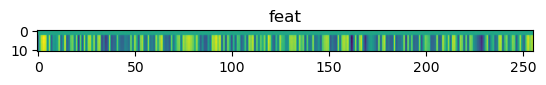

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.0577, 0.3735, 0.9150, 0.3684, 0.3777, 1.0303]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4044, 0.2272, 0.8878, 0.5827, 0.2491, 0.8729]], device='cuda:0')
L1 loss tensor(0.1701, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0496, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.1047, 0.3882, 0.8853, 0.3645, 0.3965, 0.9937]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4027, 0.2897, 0.8449, 0.5696, 0.2832, 0.8504]], device='cuda:0')
L1 loss tensor(0.1498, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0499, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.5977, 0.5005, 0.7114, 0.0787, 0.2502, 0.8271],
        [0.0611, 0.3748, 0.9111, 0.3682, 0.3801, 1.0264],
        [0.3848, 0.1064, 0.4832, 0.6743, 0.3838, 0.8081]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1683, 0.4644, 0.5880, 0.1853, 0.4603, 0.5979],
        [0.2933, 0.4422, 0.6301, 0.3231, 0.4424, 0.6298],
        [0.4349, 0.2799, 0.8403, 0.5767, 0.2306, 0.8782]], device='cuda:0')
L1 loss tensor(0.1734, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.3130, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.0728, 0.3784, 0.9048, 0.3665, 0.3843, 1.0176]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1301, 0.2241, 0.8883, 0.3297, 0.2114, 0.8963]], device='cuda:0')
L1 loss tensor(0.0932, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0497, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.0735, 0.3782, 0.9043, 0.3667, 0.3833, 1.0156],
        [0.3955, 0.1148, 0.4778, 0.6704, 0.3865, 0.7935]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1490, 0.3818, 0.7947, 0.1808, 0.3270, 0.7947],
        [0.4750, 0.2943, 0.8376, 0.5285, 0.3651, 0.7605]], device='cuda:0')
L1 loss tensor(0.1222, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1297, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([3, 3, 256])
patcher torch.Size([3, 8, 256])
patcher + token torch.Size([3, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([3, 11, 256])
encoder torch.Size([3, 11, 256])
pred box tensor([[0.1550, 0.1724, 0.5752, 0.5508, 0.3489, 0.7026],
        [0.5703, 0.0289, 0.2258, 0.7466, 0.1869, 0.4839]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1493, 0.3349, 0.7973, 0.2632, 0.3426, 0.7886],
        [0.6557, 0.3235, 0.8131, 0.7732, 0.3373, 0.7983]], device='cuda:0')
L1 loss tensor(0.1858, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1309, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.6577, 0.3530, 0.4729, 0.1987, 0.1879, 0.5596],
        [0.1287, 0.1685, 0.5928, 0.5532, 0.3403, 0.7241]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.7501, 0.4075, 0.6955, 0.7948, 0.4097, 0.6915],
        [0.3826, 0.1989, 0.8989, 0.6217, 0.1895, 0.9046]], device='cuda:0')
L1 loss tensor(0.2443, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.2371, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.1248, 0.1694, 0.5933, 0.5537, 0.3394, 0.7261]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4022, 0.2485, 0.8723, 0.5710, 0.2421, 0.8768]], device='cuda:0')
L1 loss tensor(0.1501, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0485, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[0.3455, 0.1272, 0.5210, 0.7993, 0.2686, 0.5474]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4840, 0.3223, 0.8129, 0.5891, 0.3601, 0.7693]], device='cuda:0')
L1 loss tensor(0.1915, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0500, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2949, 0.1271, 0.5449, 0.8066, 0.2559, 0.5796]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4022, 0.2485, 0.8723, 0.5710, 0.2421, 0.8768]], device='cuda:0')
L1 loss tensor(0.1838, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0492, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.7593,  0.3032,  0.4846,  0.4260,  0.1471,  0.4712],
        [ 0.2810,  0.1271,  0.5508,  0.8086,  0.2542,  0.5894],
        [ 0.7891,  0.0496,  0.2539,  0.9478,  0.0311,  0.4016],
        [ 7.7539, 24.7969, 17.2500,  0.7778,  7.8320, -4.5938]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4439, 0.4301, 0.6548, 0.4709, 0.4383, 0.6383],
        [0.2345, 0.4434, 0.6372, 0.2667, 0.4343, 0.6569],
        [0.6360, 0.4125, 0.6761, 0.6746, 0.4190, 0.6647],
        [0.5016, 0.4353, 0.6492, 0.5340, 0.4272, 0.6657]], device='cuda:0')
L1 loss tensor(2.7326, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(2.7311, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.7671, 0.2969, 0.4797, 0.4229, 0.1454, 0.4651],
        [0.2893, 0.1207, 0.5469, 0.8076, 0.2520, 0.5835],
        [0.7964, 0.0468, 0.2496, 0.9453, 0.0278, 0.3936]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2933, 0.4422, 0.6301, 0.3231, 0.4424, 0.6298],
        [0.1683, 0.4644, 0.5880, 0.1853, 0.4603, 0.5979],
        [0.4349, 0.2799, 0.8403, 0.5767, 0.2306, 0.8782]], device='cuda:0')
L1 loss tensor(0.2739, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.3186, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.3098, 0.1274, 0.5337, 0.8062, 0.2576, 0.5649]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2281, 0.2236, 0.9058, 0.5764, 0.1084, 0.9589]], device='cuda:0')
L1 loss tensor(0.2205, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0495, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[0.5229, 0.2578, 0.7295, 0.8062, 0.1588, 0.6641]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3680, 0.2880, 0.8495, 0.5285, 0.2962, 0.8426]], device='cuda:0')
L1 loss tensor(0.1498, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0518, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.9077, 0.4026, 0.6626, 0.4280, 0.1439, 0.5200],
        [0.5439, 0.2551, 0.7222, 0.8018, 0.1650, 0.6523]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1493, 0.3349, 0.7973, 0.2632, 0.3426, 0.7886],
        [0.6557, 0.3235, 0.8131, 0.7732, 0.3373, 0.7983]], device='cuda:0')
L1 loss tensor(0.1842, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.2336, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.8799, 0.3967, 0.6826, 0.4373, 0.1323, 0.5488],
        [0.5171, 0.2510, 0.7388, 0.8052, 0.1555, 0.6729]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.7501, 0.4075, 0.6955, 0.7948, 0.4097, 0.6915],
        [0.3826, 0.1989, 0.8989, 0.6217, 0.1895, 0.9046]], device='cuda:0')
L1 loss tensor(0.1854, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.2353, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.5195, 0.2498, 0.7358, 0.8027, 0.1569, 0.6699]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1301, 0.2241, 0.8883, 0.3297, 0.2114, 0.8963]], device='cuda:0')
L1 loss tensor(0.2202, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0521, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.9023, 0.4072, 0.6641, 0.4302, 0.1439, 0.5220],
        [0.5376, 0.2595, 0.7246, 0.8032, 0.1647, 0.6553]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3734, 0.4525, 0.6094, 0.3908, 0.4459, 0.6241],
        [0.7547, 0.4627, 0.5916, 0.8132, 0.4636, 0.5896]], device='cuda:0')
L1 loss tensor(0.1667, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.2343, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[0.6553, 0.3977, 0.9937, 0.6606, 0.2507, 0.9141]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.0992, 0.2652, 0.8614, 0.2375, 0.2747, 0.8539]], device='cuda:0')
L1 loss tensor(0.2214, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0551, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.6914, 0.4133, 0.9746, 0.6587, 0.2661, 0.8857]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4027, 0.2897, 0.8449, 0.5696, 0.2832, 0.8504]], device='cuda:0')
L1 loss tensor(0.1139, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0554, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.6572, 0.3936, 0.9897, 0.6646, 0.2443, 0.9092]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2245, 0.2741, 0.7487, 0.7194, 0.2171, 0.8048]], device='cuda:0')
L1 loss tensor(0.1633, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0553, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.6460, 0.3955, 1.0000, 0.6641, 0.2450, 0.9214]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4044, 0.2272, 0.8878, 0.5827, 0.2491, 0.8729]], device='cuda:0')
L1 loss tensor(0.1094, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0551, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.8706, 0.4836, 0.9395, 0.3354, 0.3032, 0.7856],
        [0.6606, 0.4004, 0.9907, 0.6611, 0.2520, 0.9077]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1490, 0.3818, 0.7947, 0.1808, 0.3270, 0.7947],
        [0.4750, 0.2943, 0.8376, 0.5285, 0.3651, 0.7605]], device='cuda:0')
L1 loss tensor(0.1661, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.2280, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([3, 3, 256])
patcher torch.Size([3, 8, 256])
patcher + token torch.Size([3, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([3, 11, 256])
encoder torch.Size([3, 11, 256])
pred box tensor([[0.4951, 0.3511, 0.9385, 0.4531, 0.4934, 0.9238]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1958, 0.2334, 0.8761, 0.3895, 0.2266, 0.8808]], device='cuda:0')
L1 loss tensor(0.1421, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0564, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.5220, 0.3628, 0.9277, 0.4531, 0.5029, 0.9082]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.5182, 0.4623, 0.5875, 0.5325, 0.4611, 0.5903]], device='cuda:0')
L1 loss tensor(0.1471, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0565, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.4917, 0.3452, 0.9429, 0.4526, 0.4893, 0.9277],
        [1.0732, 0.4355, 0.7402, 0.6064, 0.0862, 0.6992]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4204, 0.3814, 0.7442, 0.4958, 0.3936, 0.7253],
        [0.7810, 0.3339, 0.8079, 0.9365, 0.2692, 0.8660]], device='cuda:0')
L1 loss tensor(0.1491, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1209, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
cls_token torch.Size([5, 3, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[0.0572, 0.3313, 0.7051, 0.3567, 0.5664, 0.7373],
        [0.7676, 0.4438, 0.6763, 0.5376, 0.1587, 0.6582]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3826, 0.1989, 0.8989, 0.6217, 0.1895, 0.9046],
        [0.7501, 0.4075, 0.6955, 0.7948, 0.4097, 0.6915]], device='cuda:0')
L1 loss tensor(0.1730, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1202, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.0595, 0.3369, 0.7017, 0.3562, 0.5713, 0.7339]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1958, 0.2334, 0.8761, 0.3895, 0.2266, 0.8808]], device='cuda:0')
L1 loss tensor(0.1565, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0576, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.0593, 0.3303, 0.7026, 0.3560, 0.5674, 0.7349]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1301, 0.2241, 0.8883, 0.3297, 0.2114, 0.8963]], device='cuda:0')
L1 loss tensor(0.1511, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0577, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.0547, 0.3274, 0.7046, 0.3542, 0.5645, 0.7393]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.0992, 0.2652, 0.8614, 0.2375, 0.2747, 0.8539]], device='cuda:0')
L1 loss tensor(0.1308, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0577, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.0872, 0.3481, 0.6909, 0.3567, 0.5811, 0.7192]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.5182, 0.4623, 0.5875, 0.5325, 0.4611, 0.5903]], device='cuda:0')
L1 loss tensor(0.1789, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0576, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[-0.0317,  0.1832,  0.6401,  0.2600,  0.4390,  0.7153],
        [ 0.6636,  0.3513,  0.7412,  0.4832,  0.1249,  0.7251]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1493, 0.3349, 0.7973, 0.2632, 0.3426, 0.7886],
        [0.6557, 0.3235, 0.8131, 0.7732, 0.3373, 0.7983]], device='cuda:0')
L1 loss tensor(0.1122, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1212, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[-0.0601,  0.1749,  0.6548,  0.2610,  0.4314,  0.7344],
        [ 0.6396,  0.3362,  0.7529,  0.4893,  0.1199,  0.7520]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4204, 0.3814, 0.7442, 0.4958, 0.3936, 0.7253],
        [0.7810, 0.3339, 0.8079, 0.9365, 0.2692, 0.8660]], device='cuda:0')
L1 loss tensor(0.1639, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1211, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[-1.7258e-02,  1.9897e-01,  9.0186e-01, -1.5640e-02,  7.5000e-01,
          9.7607e-01],
        [-7.7454e-02,  1.7603e-01,  6.6016e-01,  2.6392e-01,  4.2896e-01,
          7.4658e-01],
        [ 6.2402e-01,  3.3057e-01,  7.5684e-01,  4.9390e-01,  1.1969e-01,
          7.7002e-01],
        [-8.9141e+00,  2.3750e+01, -1.5633e+01, -3.6594e+01,  7.0703e+00,
         -6.8594e+00]], device='cuda:0', dtype=torch.float16,
       grad_fn=<IndexBackward0>)
gt box tensor([[0.4439, 0.4301, 0.6548, 0.4709, 0.4383, 0.6383],
        [0.5016, 0.4353, 0.6492, 0.5340, 0.4272, 0.6657],
        [0.6360, 0.4125, 0.6761, 0.6746, 0.4190, 0.6647],
        [0.2345, 0.4434, 0.6372, 0.2667, 0.4343, 0.6569]], device='cuda:0')
L1 loss tensor(4.3421, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(2.3577, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[-0.0724,  0.1692,  0.6606,  0.2625,  0.4248,  0.7437]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4044, 0.2272, 0.8878, 0.5827, 0.2491, 0.8729]], device='cuda:0')
L1 loss tensor(0.2312, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0576, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[-0.0383,  0.1868,  0.6416,  0.2615,  0.4390,  0.7183],
        [ 0.6582,  0.3542,  0.7427,  0.4854,  0.1248,  0.7285]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3734, 0.4525, 0.6094, 0.3908, 0.4459, 0.6241],
        [0.7547, 0.4627, 0.5916, 0.8132, 0.4636, 0.5896]], device='cuda:0')
L1 loss tensor(0.1751, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1216, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[-0.0559,  0.1390,  0.9839,  0.0768,  0.7744,  1.0625],
        [-0.0066,  0.1392,  0.7031,  0.3516,  0.2778,  0.7544],
        [ 0.6528,  0.2949,  0.8857,  0.6665,  0.1603,  0.8613]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1683, 0.4644, 0.5880, 0.1853, 0.4603, 0.5979],
        [0.2933, 0.4422, 0.6301, 0.3231, 0.4424, 0.6298],
        [0.4349, 0.2799, 0.8403, 0.5767, 0.2306, 0.8782]], device='cuda:0')
L1 loss tensor(0.1823, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.2639, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.0510, 0.1494, 0.6807, 0.3435, 0.2957, 0.7183]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4840, 0.3223, 0.8129, 0.5891, 0.3601, 0.7693]], device='cuda:0')
L1 loss tensor(0.1832, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0628, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.0021, 0.1365, 0.6968, 0.3525, 0.2737, 0.7446]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2245, 0.2741, 0.7487, 0.7194, 0.2171, 0.8048]], device='cuda:0')
L1 loss tensor(0.1493, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0621, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.0095, 0.1521, 0.6929, 0.3530, 0.2847, 0.7402]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3680, 0.2880, 0.8495, 0.5285, 0.2962, 0.8426]], device='cuda:0')
L1 loss tensor(0.1568, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0616, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.0381, 0.1578, 0.6841, 0.3477, 0.2964, 0.7236]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4027, 0.2897, 0.8449, 0.5696, 0.2832, 0.8504]], device='cuda:0')
L1 loss tensor(0.1699, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0622, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([3, 3, 256])
patcher torch.Size([3, 8, 256])
patcher + token torch.Size([3, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([3, 11, 256])
encoder torch.Size([3, 11, 256])
pred box tensor([[0.3130, 0.2847, 0.9072, 0.5571, 0.1484, 0.9023]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2281, 0.2236, 0.9058, 0.5764, 0.1084, 0.9589]], device='cuda:0')
L1 loss tensor(0.0439, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0653, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2981, 0.2817, 0.9185, 0.5581, 0.1454, 0.9160]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4022, 0.2485, 0.8723, 0.5710, 0.2421, 0.8768]], device='cuda:0')
L1 loss tensor(0.0554, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0649, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.0967, 0.2173, 1.1504, 0.2598, 0.7949, 1.2256],
        [0.3047, 0.2808, 0.9141, 0.5557, 0.1462, 0.9102]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1490, 0.3818, 0.7947, 0.1808, 0.3270, 0.7947],
        [0.4750, 0.2943, 0.8376, 0.5285, 0.3651, 0.7605]], device='cuda:0')
L1 loss tensor(0.1839, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.2050, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])


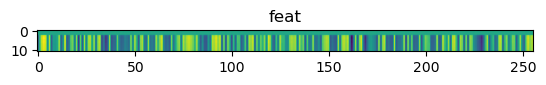

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.6016, 0.3059, 0.8901, 0.8457, 0.0522, 1.0059]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4044, 0.2272, 0.8878, 0.5827, 0.2491, 0.8729]], device='cuda:0')
L1 loss tensor(0.1452, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0670, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.6128, 0.3052, 0.8804, 0.8467, 0.0504, 0.9937]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2245, 0.2741, 0.7487, 0.7194, 0.2171, 0.8048]], device='cuda:0')
L1 loss tensor(0.1723, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0667, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.6240, 0.3167, 0.8750, 0.8438, 0.0607, 0.9854]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2281, 0.2236, 0.9058, 0.5764, 0.1084, 0.9589]], device='cuda:0')
L1 loss tensor(0.1435, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0666, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.6157, 0.3186, 0.8813, 0.8438, 0.0630, 0.9932]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1958, 0.2334, 0.8761, 0.3895, 0.2266, 0.8808]], device='cuda:0')
L1 loss tensor(0.2068, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0663, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
pred box tensor([[0.6104, 0.3142, 0.8857, 0.8452, 0.0575, 0.9990]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4022, 0.2485, 0.8723, 0.5710, 0.2421, 0.8768]], device='cuda:0')
L1 loss tensor(0.1447, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0688, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[0.6416, 0.1753, 0.6494, 0.9282, 0.2273, 0.8345]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4027, 0.2897, 0.8449, 0.5696, 0.2832, 0.8504]], device='cuda:0')
L1 loss tensor(0.1632, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0640, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2441, 0.1561, 0.9619, 0.5215, 0.9492, 1.2451],
        [0.6084, 0.1598, 0.6675, 0.9336, 0.2123, 0.8589]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3826, 0.1989, 0.8989, 0.6217, 0.1895, 0.9046],
        [0.7501, 0.4075, 0.6955, 0.7948, 0.4097, 0.6915]], device='cuda:0')
L1 loss tensor(0.1971, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1990, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.6357, 0.1798, 0.6533, 0.9321, 0.2280, 0.8398]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.5182, 0.4623, 0.5875, 0.5325, 0.4611, 0.5903]], device='cuda:0')
L1 loss tensor(0.2247, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0636, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2439, 0.1560, 0.9600, 0.5195, 0.9502, 1.2451],
        [0.6069, 0.1587, 0.6665, 0.9326, 0.2133, 0.8574]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4204, 0.3814, 0.7442, 0.4958, 0.3936, 0.7253],
        [0.7810, 0.3339, 0.8079, 0.9365, 0.2692, 0.8660]], device='cuda:0')
L1 loss tensor(0.1897, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1986, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2474, 0.1564, 0.9575, 0.5176, 0.9502, 1.2402],
        [0.6108, 0.1591, 0.6646, 0.9321, 0.2135, 0.8550]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1490, 0.3818, 0.7947, 0.1808, 0.3270, 0.7947],
        [0.4750, 0.2943, 0.8376, 0.5285, 0.3651, 0.7605]], device='cuda:0')
L1 loss tensor(0.2488, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1985, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[0.1976, 0.2720, 0.7554, 0.4856, 1.1133, 1.0312],
        [0.5420, 0.2322, 0.4824, 0.9126, 0.4683, 0.6406]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1493, 0.3349, 0.7973, 0.2632, 0.3426, 0.7886],
        [0.6557, 0.3235, 0.8131, 0.7732, 0.3373, 0.7983]], device='cuda:0')
L1 loss tensor(0.1961, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1930, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.5186, 0.2227, 0.4954, 0.9146, 0.4590, 0.6562]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1301, 0.2241, 0.8883, 0.3297, 0.2114, 0.8963]], device='cuda:0')
L1 loss tensor(0.3092, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0652, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.1581, 0.2544, 0.7744, 0.4988, 1.0938, 1.0645],
        [0.5063, 0.2163, 0.4988, 0.9155, 0.4541, 0.6650],
        [0.9507, 0.3525, 0.8975, 1.3164, 0.6660, 1.0508]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1683, 0.4644, 0.5880, 0.1853, 0.4603, 0.5979],
        [0.2933, 0.4422, 0.6301, 0.3231, 0.4424, 0.6298],
        [0.4349, 0.2799, 0.8403, 0.5767, 0.2306, 0.8782]], device='cuda:0')
L1 loss tensor(0.2791, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(1.3380, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.1912, 0.2769, 0.7568, 0.4902, 1.1133, 1.0342],
        [0.5371, 0.2360, 0.4849, 0.9141, 0.4678, 0.6431]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3734, 0.4525, 0.6094, 0.3908, 0.4459, 0.6241],
        [0.7547, 0.4627, 0.5916, 0.8132, 0.4636, 0.5896]], device='cuda:0')
L1 loss tensor(0.1993, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1935, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[  0.1486,   0.2603,   0.7788,   0.5024,   1.0967,   1.0703],
        [  0.4978,   0.2223,   0.5029,   0.9175,   0.4565,   0.6699],
        [  0.9424,   0.3550,   0.9009,   1.3193,   0.6699,   1.0596],
        [ -1.4746,   0.4778, -15.2188, -36.7500, -13.0547,   6.7422]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4439, 0.4301, 0.6548, 0.4709, 0.4383, 0.6383],
        [0.5016, 0.4353, 0.6492, 0.5340, 0.4272, 0.6657],
        [0.6360, 0.4125, 0.6761, 0.6746, 0.4190, 0.6647],
        [0.2345, 0.4434, 0.6372, 0.2667, 0.4343, 0.6569]], device='cuda:0')
L1 loss tensor(3.3281, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(3.2309, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([3, 3, 256])
patcher torch.Size([3, 8, 256])
patcher + token torch.Size([3, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([3, 11, 256])
encoder torch.Size([3, 11, 256])
pred box tensor([[0.4331, 0.4038, 0.4607, 0.7334, 0.4941, 0.4253]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.0992, 0.2652, 0.8614, 0.2375, 0.2747, 0.8539]], device='cuda:0')
L1 loss tensor(0.3362, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0593, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.4822, 0.4155, 0.4412, 0.7275, 0.5112, 0.3999]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4840, 0.3223, 0.8129, 0.5891, 0.3601, 0.7693]], device='cuda:0')
L1 loss tensor(0.1876, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0603, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.4424, 0.4175, 0.4524, 0.7373, 0.4993, 0.4155]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3680, 0.2880, 0.8495, 0.5285, 0.2962, 0.8426]], device='cuda:0')
L1 loss tensor(0.2400, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0590, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


encoder torch.Size([5, 11, 256])
pred box tensor([[0.3962, 0.3748, 0.6597, 0.3145, 0.3018, 0.4597]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.5182, 0.4623, 0.5875, 0.5325, 0.4611, 0.5903]], device='cuda:0')
L1 loss tensor(0.1316, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0555, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.3672, 0.3523, 0.6729, 0.3127, 0.2849, 0.4739],
        [0.7837, 0.5527, 0.9712, 0.9189, 0.5298, 0.8154]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4204, 0.3814, 0.7442, 0.4958, 0.3936, 0.7253],
        [0.7810, 0.3339, 0.8079, 0.9365, 0.2692, 0.8660]], device='cuda:0')
L1 loss tensor(0.1175, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1396, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.3735, 0.3633, 0.6650, 0.3162, 0.2883, 0.4680]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3680, 0.2880, 0.8495, 0.5285, 0.2962, 0.8426]], device='cuda:0')
L1 loss tensor(0.1433, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0553, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.3694, 0.3596, 0.6699, 0.3140, 0.2900, 0.4717]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1958, 0.2334, 0.8761, 0.3895, 0.2266, 0.8808]], device='cuda:0')
L1 loss tensor(0.1757, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0554, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.3948, 0.3635, 0.6592, 0.3120, 0.2957, 0.4592],
        [0.8076, 0.5693, 0.9619, 0.9131, 0.5381, 0.7905]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1493, 0.3349, 0.7973, 0.2632, 0.3426, 0.7886],
        [0.6557, 0.3235, 0.8131, 0.7732, 0.3373, 0.7983]], device='cuda:0')
L1 loss tensor(0.1444, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1397, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[0.2563, 0.2321, 0.9028, 0.0319, 0.1473, 0.6963]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4022, 0.2485, 0.8723, 0.5710, 0.2421, 0.8768]], device='cuda:0')
L1 loss tensor(0.1679, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0526, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2715, 0.2352, 0.8926, 0.0325, 0.1511, 0.6865]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2281, 0.2236, 0.9058, 0.5764, 0.1084, 0.9589]], device='cuda:0')
L1 loss tensor(0.1545, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0529, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.3091, 0.2408, 0.8804, 0.0263, 0.1639, 0.6714]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4840, 0.3223, 0.8129, 0.5891, 0.3601, 0.7693]], device='cuda:0')
L1 loss tensor(0.1968, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0537, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[-0.0797,  0.5127,  0.7817, -0.3269,  0.6323,  0.7266],
        [ 0.2507,  0.2249,  0.9043,  0.0312,  0.1434,  0.6987],
        [ 0.6152,  0.4492,  1.0479,  0.7173,  0.3611,  0.9722]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1683, 0.4644, 0.5880, 0.1853, 0.4603, 0.5979],
        [0.2933, 0.4422, 0.6301, 0.3231, 0.4424, 0.6298],
        [0.4349, 0.2799, 0.8403, 0.5767, 0.2306, 0.8782]], device='cuda:0')
L1 loss tensor(0.1900, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.2752, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2478, 0.2219, 0.9072, 0.0317, 0.1405, 0.7007]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4044, 0.2272, 0.8878, 0.5827, 0.2491, 0.8729]], device='cuda:0')
L1 loss tensor(0.1689, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0527, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[ 0.2751,  0.1785,  0.9785, -0.0518,  0.1177,  1.0000]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1301, 0.2241, 0.8883, 0.3297, 0.2114, 0.8963]], device='cuda:0')
L1 loss tensor(0.1433, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0505, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.2739,  0.1781,  0.9814, -0.0509,  0.1170,  1.0020],
        [ 0.5405,  0.3862,  1.0020,  0.6309,  0.2551,  1.1426]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3826, 0.1989, 0.8989, 0.6217, 0.1895, 0.9046],
        [0.7501, 0.4075, 0.6955, 0.7948, 0.4097, 0.6915]], device='cuda:0')
L1 loss tensor(0.1968, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1541, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ -0.1009,   0.5151,   0.7329,  -0.4351,   0.5093,   0.8374],
        [  0.2549,   0.1776,   0.9873,  -0.0508,   0.1140,   1.0098],
        [  0.5229,   0.3821,   1.0049,   0.6323,   0.2542,   1.1562],
        [ 21.7188, -25.7500,  11.7031, -19.7969, -10.4453,   5.9414]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2345, 0.4434, 0.6372, 0.2667, 0.4343, 0.6569],
        [0.4439, 0.4301, 0.6548, 0.4709, 0.4383, 0.6383],
        [0.5016, 0.4353, 0.6492, 0.5340, 0.4272, 0.6657],
        [0.6360, 0.4125, 0.6761, 0.6746, 0.4190, 0.6647]], device='cuda:0')
L1 loss tensor(4.1470, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(8.8186, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.2705,  0.1746,  0.9810, -0.0533,  0.1149,  1.0039]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.0992, 0.2652, 0.8614, 0.2375, 0.2747, 0.8539]], device='cuda:0')
L1 loss tensor(0.1637, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0505, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.3081,  0.1971,  0.9624, -0.0520,  0.1335,  0.9849]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4027, 0.2897, 0.8449, 0.5696, 0.2832, 0.8504]], device='cuda:0')
L1 loss tensor(0.2017, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0507, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([3, 3, 256])
patcher torch.Size([3, 8, 256])
patcher + token torch.Size([3, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([3, 11, 256])
encoder torch.Size([3, 11, 256])
pred box tensor([[0.2065, 0.3276, 0.8110, 0.1057, 0.3091, 1.0391],
        [0.4299, 0.4924, 0.7441, 0.7402, 0.3435, 1.0918]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1490, 0.3818, 0.7947, 0.1808, 0.3270, 0.7947],
        [0.4750, 0.2943, 0.8376, 0.5285, 0.3651, 0.7605]], device='cuda:0')
L1 loss tensor(0.1139, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1584, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2036, 0.3188, 0.8096, 0.1089, 0.2998, 1.0391]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2245, 0.2741, 0.7487, 0.7194, 0.2171, 0.8048]], device='cuda:0')
L1 loss tensor(0.1756, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0498, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2256, 0.3423, 0.8018, 0.1074, 0.3191, 1.0312],
        [0.4453, 0.5103, 0.7383, 0.7388, 0.3538, 1.0762]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3734, 0.4525, 0.6094, 0.3908, 0.4459, 0.6241],
        [0.7547, 0.4627, 0.5916, 0.8132, 0.4636, 0.5896]], device='cuda:0')
L1 loss tensor(0.2035, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1590, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


encoder torch.Size([5, 11, 256])
pred box tensor([[0.2649, 0.4294, 0.4941, 0.4089, 0.5518, 0.8838],
        [0.5249, 0.4810, 0.3965, 0.9492, 0.5698, 0.8511]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1493, 0.3349, 0.7973, 0.2632, 0.3426, 0.7886],
        [0.6557, 0.3235, 0.8131, 0.7732, 0.3373, 0.7983]], device='cuda:0')
L1 loss tensor(0.1775, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1579, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2328, 0.4192, 0.5103, 0.4106, 0.5386, 0.8994]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4022, 0.2485, 0.8723, 0.5710, 0.2421, 0.8768]], device='cuda:0')
L1 loss tensor(0.1969, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0504, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2666, 0.4412, 0.4951, 0.4111, 0.5581, 0.8848]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.5182, 0.4623, 0.5875, 0.5325, 0.4611, 0.5903]], device='cuda:0')
L1 loss tensor(0.1463, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0505, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2389, 0.4185, 0.5073, 0.4087, 0.5410, 0.8960]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1301, 0.2241, 0.8883, 0.3297, 0.2114, 0.8963]], device='cuda:0')
L1 loss tensor(0.1822, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0506, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2488, 0.4236, 0.5000, 0.4114, 0.5435, 0.8906]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2281, 0.2236, 0.9058, 0.5764, 0.1084, 0.9589]], device='cuda:0')
L1 loss tensor(0.2158, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0506, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[0.3389, 0.4070, 0.4304, 0.7026, 0.5479, 0.7261]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4840, 0.3223, 0.8129, 0.5891, 0.3601, 0.7693]], device='cuda:0')
L1 loss tensor(0.1595, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0515, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2896, 0.4033, 0.4487, 0.7090, 0.5361, 0.7466]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1958, 0.2334, 0.8761, 0.3895, 0.2266, 0.8808]], device='cuda:0')
L1 loss tensor(0.2424, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0505, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.0194,  0.6982,  0.0316, -0.0160,  0.6177,  0.3049],
        [ 0.2764,  0.3901,  0.4548,  0.7080,  0.5264,  0.7529],
        [ 0.6045,  0.3413,  0.2754,  1.1279,  0.5791,  0.6548]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1683, 0.4644, 0.5880, 0.1853, 0.4603, 0.5979],
        [0.2933, 0.4422, 0.6301, 0.3231, 0.4424, 0.6298],
        [0.4349, 0.2799, 0.8403, 0.5767, 0.2306, 0.8782]], device='cuda:0')
L1 loss tensor(0.2414, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.2801, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2859, 0.3958, 0.4524, 0.7080, 0.5322, 0.7476],
        [0.6138, 0.3486, 0.2749, 1.1250, 0.5835, 0.6470]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4204, 0.3814, 0.7442, 0.4958, 0.3936, 0.7253],
        [0.7810, 0.3339, 0.8079, 0.9365, 0.2692, 0.8660]], device='cuda:0')
L1 loss tensor(0.1876, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1574, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2859, 0.3884, 0.4478, 0.7109, 0.5229, 0.7451]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2245, 0.2741, 0.7487, 0.7194, 0.2171, 0.8048]], device='cuda:0')
L1 loss tensor(0.1418, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0509, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])


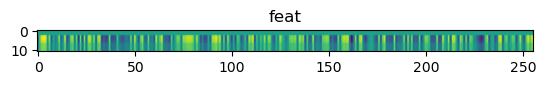

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.4392, 0.2260, 0.5991, 0.8491, 0.3267, 0.7510]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4027, 0.2897, 0.8449, 0.5696, 0.2832, 0.8504]], device='cuda:0')
L1 loss tensor(0.1281, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0522, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.4241, 0.2217, 0.6045, 0.8511, 0.3210, 0.7568],
        [0.8057, 0.0889, 0.3503, 1.1436, 0.4231, 0.5913]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3734, 0.4525, 0.6094, 0.3908, 0.4459, 0.6241],
        [0.7547, 0.4627, 0.5916, 0.8132, 0.4636, 0.5896]], device='cuda:0')
L1 loss tensor(0.1703, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1556, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.3862, 0.2000, 0.6235, 0.8496, 0.3054, 0.7749]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4044, 0.2272, 0.8878, 0.5827, 0.2491, 0.8729]], device='cuda:0')
L1 loss tensor(0.1218, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0518, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.1799, 0.5415, 0.0903, 0.0431, 0.4099, 0.2476],
        [0.4038, 0.2084, 0.6143, 0.8491, 0.3113, 0.7656]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1490, 0.3818, 0.7947, 0.1808, 0.3270, 0.7947],
        [0.4750, 0.2943, 0.8376, 0.5285, 0.3651, 0.7605]], device='cuda:0')
L1 loss tensor(0.2019, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1710, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.4011, 0.2084, 0.6182, 0.8506, 0.3113, 0.7681],
        [0.7866, 0.0716, 0.3594, 1.1465, 0.4133, 0.6113]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3826, 0.1989, 0.8989, 0.6217, 0.1895, 0.9046],
        [0.7501, 0.4075, 0.6955, 0.7948, 0.4097, 0.6915]], device='cuda:0')
L1 loss tensor(0.1617, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1550, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
cls_token torch.Size([3, 3, 256])
patcher torch.Size([3, 8, 256])
patcher + token torch.Size([3, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([3, 11, 256])
encoder torch.Size([3, 11, 256])
pred box tensor([[ 2.0789e-01,  4.7607e-01,  3.4253e-01,  2.4414e-04,  1.2231e-01,
          2.8784e-01],
        [ 4.3628e-01,  1.5771e-01,  9.8340e-01,  8.0908e-01,  2.0752e-02,
          8.7695e-01],
        [ 8.0811e-01, -4.9072e-02,  6.5039e-01,  1.0186e+00,  1.8567e

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.4534, 0.1538, 0.9766, 0.8071, 0.0210, 0.8691]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.0992, 0.2652, 0.8614, 0.2375, 0.2747, 0.8539]], device='cuda:0')
L1 loss tensor(0.2366, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0541, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.4614, 0.1685, 0.9697, 0.8120, 0.0260, 0.8633]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3680, 0.2880, 0.8495, 0.5285, 0.2962, 0.8426]], device='cuda:0')
L1 loss tensor(0.1513, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0538, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[ 0.3132,  0.3113,  1.0996,  0.6567, -0.0468,  0.7998]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4027, 0.2897, 0.8449, 0.5696, 0.2832, 0.8504]], device='cuda:0')
L1 loss tensor(0.1389, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0577, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.2891,  0.2988,  1.1064,  0.6587, -0.0597,  0.8086]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2281, 0.2236, 0.9058, 0.5764, 0.1084, 0.9589]], device='cuda:0')
L1 loss tensor(0.1229, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0575, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.1232,  0.5176,  0.4355, -0.1154, -0.0026,  0.2394],
        [ 0.2666,  0.2883,  1.1172,  0.6567, -0.0663,  0.8203],
        [ 0.6870, -0.0339,  0.7622,  0.8101,  0.1091,  0.5972]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1683, 0.4644, 0.5880, 0.1853, 0.4603, 0.5979],
        [0.4349, 0.2799, 0.8403, 0.5767, 0.2306, 0.8782],
        [0.2933, 0.4422, 0.6301, 0.3231, 0.4424, 0.6298]], device='cuda:0')
L1 loss tensor(0.2419, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.2553, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.2744,  0.2900,  1.1143,  0.6553, -0.0632,  0.8174]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.0992, 0.2652, 0.8614, 0.2375, 0.2747, 0.8539]], device='cuda:0')
L1 loss tensor(0.2075, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0574, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.3066,  0.3164,  1.1035,  0.6587, -0.0461,  0.8032]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.5182, 0.4623, 0.5875, 0.5325, 0.4611, 0.5903]], device='cuda:0')
L1 loss tensor(0.2866, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0573, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[ 0.1450,  0.3208,  1.0645,  0.3521,  0.0598,  0.8760],
        [ 0.5864, -0.0619,  0.7803,  0.5044,  0.1898,  0.6411]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4204, 0.3814, 0.7442, 0.4958, 0.3936, 0.7253],
        [0.7810, 0.3339, 0.8079, 0.9365, 0.2692, 0.8660]], device='cuda:0')
L1 loss tensor(0.2199, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1423, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.1324, 0.3130, 1.0693, 0.3528, 0.0512, 0.8823]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4044, 0.2272, 0.8878, 0.5827, 0.2491, 0.8729]], device='cuda:0')
L1 loss tensor(0.1628, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0600, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.1411, 0.3228, 1.0654, 0.3528, 0.0578, 0.8789]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4022, 0.2485, 0.8723, 0.5710, 0.2421, 0.8768]], device='cuda:0')
L1 loss tensor(0.1555, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0598, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.1487,  0.3215,  1.0615,  0.3518,  0.0594,  0.8735],
        [ 0.5898, -0.0609,  0.7783,  0.5029,  0.1896,  0.6382]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1490, 0.3818, 0.7947, 0.1808, 0.3270, 0.7947],
        [0.4750, 0.2943, 0.8376, 0.5285, 0.3651, 0.7605]], device='cuda:0')
L1 loss tensor(0.1415, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1423, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.1514, 0.3323, 1.0576, 0.3545, 0.0617, 0.8706]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3680, 0.2880, 0.8495, 0.5285, 0.2962, 0.8426]], device='cuda:0')
L1 loss tensor(0.1509, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0597, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[0.1924, 0.2893, 0.8618, 0.2415, 0.3701, 0.7944]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1958, 0.2334, 0.8761, 0.3895, 0.2266, 0.8808]], device='cuda:0')
L1 loss tensor(0.0752, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0618, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2427, 0.2910, 0.8481, 0.2343, 0.3811, 0.7783]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4840, 0.3223, 0.8129, 0.5891, 0.3601, 0.7693]], device='cuda:0')
L1 loss tensor(0.1155, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0629, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.1924, 0.2827, 0.8628, 0.2406, 0.3657, 0.7949]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1301, 0.2241, 0.8883, 0.3297, 0.2114, 0.8963]], device='cuda:0')
L1 loss tensor(0.0819, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0621, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.1887, 0.2744, 0.8604, 0.2437, 0.3572, 0.7930]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2245, 0.2741, 0.7487, 0.7194, 0.2171, 0.8048]], device='cuda:0')
L1 loss tensor(0.1292, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0623, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.2197,  0.2930,  0.8525,  0.2391,  0.3755,  0.7837],
        [ 0.6196, -0.0567,  0.7451,  0.3792,  0.4524,  0.6279]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1493, 0.3349, 0.7973, 0.2632, 0.3426, 0.7886],
        [0.6557, 0.3235, 0.8131, 0.7732, 0.3373, 0.7983]], device='cuda:0')
L1 loss tensor(0.1161, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1390, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([3, 3, 256])
patcher torch.Size([3, 8, 256])
patcher + token torch.Size([3, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([3, 11, 256])
encoder torch.Size([3, 11, 256])
pred box tensor([[  0.2390,   0.3950,   0.2668,  -0.3347,   0.2457,   0.3298],
        [  0.3145,   0.1860,   0.6875,   0.3057,   0.4443,   0.8379],
        [  0.6787,  -0.0911,   0.7559,   0.4026,   0.5215,   0.7559],
        [-11.2656,  -0.3345, -19.3438,   4.9062,  -6.4453,   0.2439]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2345, 0.4434, 0.6372, 0.2667, 0.4343, 0.6569],
        [0.4439, 0.4301, 0.6548, 0.4709, 0.4383, 0.6383],
        [0.6360, 0.4125, 0.6761, 0.6746, 0.4190, 0.6647],
        [0.5016, 0.4353, 0.6492, 0.5340, 0.4272, 0.6657]], device='cuda:0')
L1 loss tensor(1.9845, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(17.7765, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBac

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.3354,  0.1870,  0.6836,  0.3054,  0.4468,  0.8320],
        [ 0.6978, -0.0880,  0.7559,  0.3994,  0.5239,  0.7451]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3826, 0.1989, 0.8989, 0.6217, 0.1895, 0.9046],
        [0.7501, 0.4075, 0.6955, 0.7948, 0.4097, 0.6915]], device='cuda:0')
L1 loss tensor(0.1743, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1369, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.3579,  0.2007,  0.6738,  0.3042,  0.4565,  0.8203],
        [ 0.7168, -0.0708,  0.7500,  0.3940,  0.5312,  0.7256]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3734, 0.4525, 0.6094, 0.3908, 0.4459, 0.6241],
        [0.7547, 0.4627, 0.5916, 0.8132, 0.4636, 0.5896]], device='cuda:0')
L1 loss tensor(0.1648, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1376, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
cls_token torch.Size([5, 3, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[0.5864, 0.2710, 0.4951, 0.4966, 0.4238, 0.7891],
        [0.8936, 0.1335, 0.6533, 0.6299, 0.4722, 0.6582]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1493, 0.3349, 0.7973, 0.2632, 0.3426, 0.7886],
        [0.6557, 0.3235, 0.8131, 0.7732, 0.3373, 0.7983]], device='cuda:0')
L1 loss tensor(0.1770, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1289, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.6113, 0.2693, 0.4902, 0.4922, 0.4290, 0.7837]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4840, 0.3223, 0.8129, 0.5891, 0.3601, 0.7693]], device='cuda:0')
L1 loss tensor(0.1139, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0690, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.5513, 0.2607, 0.5068, 0.4995, 0.4131, 0.8032]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4022, 0.2485, 0.8723, 0.5710, 0.2421, 0.8768]], device='cuda:0')
L1 loss tensor(0.1405, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0679, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.5791, 0.2747, 0.4968, 0.4978, 0.4236, 0.7910],
        [0.8887, 0.1367, 0.6543, 0.6323, 0.4714, 0.6606]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3734, 0.4525, 0.6094, 0.3908, 0.4459, 0.6241],
        [0.7547, 0.4627, 0.5916, 0.8132, 0.4636, 0.5896]], device='cuda:0')
L1 loss tensor(0.1312, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1292, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.5547, 0.2507, 0.5010, 0.5005, 0.4062, 0.7988]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2245, 0.2741, 0.7487, 0.7194, 0.2171, 0.8048]], device='cuda:0')
L1 loss tensor(0.1692, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0685, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[0.5649, 0.4849, 0.4946, 0.7700, 0.2512, 0.7129]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4027, 0.2897, 0.8449, 0.5696, 0.2832, 0.8504]], device='cuda:0')
L1 loss tensor(0.1796, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0732, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.5288, 0.4653, 0.5039, 0.7710, 0.2361, 0.7256],
        [0.8071, 0.4612, 0.6733, 0.9609, 0.2590, 0.5703]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4750, 0.2943, 0.8376, 0.5285, 0.3651, 0.7605],
        [0.1490, 0.3818, 0.7947, 0.1808, 0.3270, 0.7947]], device='cuda:0')
L1 loss tensor(0.2413, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1216, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.5312, 0.4758, 0.5005, 0.7734, 0.2378, 0.7222]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3680, 0.2880, 0.8495, 0.5285, 0.2962, 0.8426]], device='cuda:0')
L1 loss tensor(0.1873, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0725, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.5103, 0.4561, 0.5098, 0.7729, 0.2290, 0.7339]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4044, 0.2272, 0.8878, 0.5827, 0.2491, 0.8729]], device='cuda:0')
L1 loss tensor(0.1770, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0729, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.5220, 0.4602, 0.5059, 0.7700, 0.2340, 0.7295]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.0992, 0.2652, 0.8614, 0.2375, 0.2747, 0.8539]], device='cuda:0')
L1 loss tensor(0.2785, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0730, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[0.3384, 0.4629, 0.6831, 0.8013, 0.2524, 0.8647],
        [0.6309, 0.6201, 0.8247, 1.0830, 0.1986, 0.6362]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4204, 0.3814, 0.7442, 0.4958, 0.3936, 0.7253],
        [0.7810, 0.3339, 0.8079, 0.9365, 0.2692, 0.8660]], device='cuda:0')
L1 loss tensor(0.1426, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1171, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.3389, 0.4631, 0.6831, 0.8022, 0.2512, 0.8652],
        [0.6313, 0.6206, 0.8252, 1.0840, 0.1978, 0.6372]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3826, 0.1989, 0.8989, 0.6217, 0.1895, 0.9046],
        [0.7501, 0.4075, 0.6955, 0.7948, 0.4097, 0.6915]], device='cuda:0')
L1 loss tensor(0.1519, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1171, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.3401, 0.4705, 0.6812, 0.8022, 0.2568, 0.8643]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1958, 0.2334, 0.8761, 0.3895, 0.2266, 0.8808]], device='cuda:0')
L1 loss tensor(0.1726, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0746, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 2.6465e-01,  8.1885e-01,  3.6475e-01,  2.0288e-01, -6.2752e-03,
          3.6670e-01],
        [ 3.1641e-01,  4.6191e-01,  6.8750e-01,  8.0127e-01,  2.4915e-01,
          8.7354e-01],
        [ 6.1133e-01,  6.1572e-01,  8.2568e-01,  1.0859e+00,  1.9617e-01,
          6.5137e-01],
        [-1.8906e+00,  3.9406e+01, -1.0578e+01, -2.9016e+01,  9.7500e+00,
          3.3094e+01]], device='cuda:0', dtype=torch.float16,
       grad_fn=<IndexBackward0>)
gt box tensor([[0.4439, 0.4301, 0.6548, 0.4709, 0.4383, 0.6383],
        [0.5016, 0.4353, 0.6492, 0.5340, 0.4272, 0.6657],
        [0.6360, 0.4125, 0.6761, 0.6746, 0.4190, 0.6647],
        [0.2345, 0.4434, 0.6372, 0.2667, 0.4343, 0.6569]], device='cuda:0')
L1 loss tensor(5.3295, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(15.6793, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.3708, 0.4880, 0.6748, 0.8032, 0.2664, 0.8540]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.5182, 0.4623, 0.5875, 0.5325, 0.4611, 0.5903]], device='cuda:0')
L1 loss tensor(0.1649, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0745, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([3, 3, 256])
patcher torch.Size([3, 8, 256])
patcher + token torch.Size([3, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([3, 11, 256])
encoder torch.Size([3, 11, 256])
pred box tensor([[0.2489, 0.7109, 0.5068, 0.1696, 0.0174, 0.5391],
        [0.2766, 0.2651, 0.8657, 0.6748, 0.2954, 1.0625],
        [0.6006, 0.5347, 0.9131, 1.0391, 0.2268, 0.8408]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1683, 0.4644, 0.5880, 0.1853, 0.4603, 0.5979],
        [0.2933, 0.4422, 0.6301, 0.3231, 0.4424, 0.6298],
        [0.4349, 0.2799, 0.8403, 0.5767, 0.2306, 0.8782]], device='cuda:0')
L1 loss tensor(0.1824, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.2036, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.3000, 0.2769, 0.8574, 0.6768, 0.3015, 1.0518]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2281, 0.2236, 0.9058, 0.5764, 0.1084, 0.9589]], device='cuda:0')
L1 loss tensor(0.0933, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0794, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.2900, 0.2720, 0.8633, 0.6743, 0.3010, 1.0557]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1301, 0.2241, 0.8883, 0.3297, 0.2114, 0.8963]], device='cuda:0')
L1 loss tensor(0.1377, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0795, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])


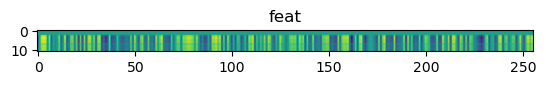

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.1001, -0.0092,  1.1260,  0.4233,  0.2512,  1.1084]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2281, 0.2236, 0.9058, 0.5764, 0.1084, 0.9589]], device='cuda:0')
L1 loss tensor(0.1711, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0844, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.0909, -0.0145,  1.1309,  0.4199,  0.2499,  1.1143]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1301, 0.2241, 0.8883, 0.3297, 0.2114, 0.8963]], device='cuda:0')
L1 loss tensor(0.1445, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0844, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.4902, 0.3896, 1.0391, 0.8872, 0.2465, 0.9575]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.5182, 0.4623, 0.5875, 0.5325, 0.4611, 0.5903]], device='cuda:0')
L1 loss tensor(0.2481, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.4309, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.0756, -0.0241,  1.1367,  0.4199,  0.2423,  1.1211]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4044, 0.2272, 0.8878, 0.5827, 0.2491, 0.8729]], device='cuda:0')
L1 loss tensor(0.2078, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0844, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.0867, -0.0230,  1.1289,  0.4226,  0.2405,  1.1123]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.2245, 0.2741, 0.7487, 0.7194, 0.2171, 0.8048]], device='cuda:0')
L1 loss tensor(0.2404, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0848, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[ 0.0718, -0.0912,  1.2051,  0.2759,  0.1615,  0.9814],
        [ 0.4778,  0.3564,  1.0020,  0.7690,  0.2710,  0.9561]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4204, 0.3814, 0.7442, 0.4958, 0.3936, 0.7253],
        [0.7810, 0.3339, 0.8079, 0.9365, 0.2692, 0.8660]], device='cuda:0')
L1 loss tensor(0.2308, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1038, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.5146, 0.3855, 0.9980, 0.7646, 0.2832, 0.9248]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4027, 0.2897, 0.8449, 0.5696, 0.2832, 0.8504]], device='cuda:0')
L1 loss tensor(0.1051, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.4300, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.0729, -0.0911,  1.2061,  0.2759,  0.1595,  0.9824],
        [ 0.4780,  0.3562,  1.0020,  0.7700,  0.2708,  0.9580]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3826, 0.1989, 0.8989, 0.6217, 0.1895, 0.9046],
        [0.7501, 0.4075, 0.6955, 0.7948, 0.4097, 0.6915]], device='cuda:0')
L1 loss tensor(0.2017, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1038, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[0.4822, 0.3696, 0.9971, 0.7695, 0.2708, 0.9458]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3680, 0.2880, 0.8495, 0.5285, 0.2962, 0.8426]], device='cuda:0')
L1 loss tensor(0.1188, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.4289, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.0695, -0.0950,  1.2041,  0.2739,  0.1591,  0.9839]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.0992, 0.2652, 0.8614, 0.2375, 0.2747, 0.8539]], device='cuda:0')
L1 loss tensor(0.1691, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0829, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([5, 3, 256])
patcher torch.Size([5, 8, 256])
patcher + token torch.Size([5, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([5, 11, 256])
encoder torch.Size([5, 11, 256])
pred box tensor([[ 0.0340,  0.4280,  0.6704, -0.0746,  0.0524,  0.4551],
        [ 0.0691, -0.1298,  1.1055,  0.1533,  0.1670,  0.7246],
        [ 0.4282,  0.2649,  0.6929,  0.6387,  0.3589,  0.7114]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1683, 0.4644, 0.5880, 0.1853, 0.4603, 0.5979],
        [0.2933, 0.4422, 0.6301, 0.3231, 0.4424, 0.6298],
        [0.4349, 0.2799, 0.8403, 0.5767, 0.2306, 0.8782]], device='cuda:0')
L1 loss tensor(0.1890, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.2051, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.0823, -0.1224,  1.1025,  0.1542,  0.1726,  0.7178],
        [ 0.4417,  0.2749,  0.6914,  0.6362,  0.3633,  0.6987]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1490, 0.3818, 0.7947, 0.1808, 0.3270, 0.7947],
        [0.4750, 0.2943, 0.8376, 0.5285, 0.3651, 0.7605]], device='cuda:0')
L1 loss tensor(0.1256, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1009, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 1.9547e-02,  4.3457e-01,  6.7432e-01, -7.4097e-02,  5.2948e-02,
          4.5752e-01],
        [ 5.7037e-02, -1.2433e-01,  1.1094e+00,  1.5332e-01,  1.6907e-01,
          7.2900e-01],
        [ 4.1602e-01,  2.6807e-01,  6.9482e-01,  6.3965e-01,  3.6157e-01,
          7.1875e-01],
        [ 1.5859e+01,  5.5094e+01,  1.1750e+01, -4.0031e+01,  6.8555e+00,
          3.3531e+01]], device='cuda:0', dtype=torch.float16,
       grad_fn=<IndexBackward0>)
gt box tensor([[0.4439, 0.4301, 0.6548, 0.4709, 0.4383, 0.6383],
        [0.2345, 0.4434, 0.6372, 0.2667, 0.4343, 0.6569],
        [0.6360, 0.4125, 0.6761, 0.6746, 0.4190, 0.6647],
        [0.5016, 0.4353, 0.6492, 0.5340, 0.4272, 0.6657]], device='cuda:0')
L1 loss tensor(6.8653, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(10.2238, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.0805, -0.1155,  1.1035,  0.1549,  0.1768,  0.7188]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1958, 0.2334, 0.8761, 0.3895, 0.2266, 0.8808]], device='cuda:0')
L1 loss tensor(0.1897, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0812, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.1057, -0.1088,  1.0967,  0.1559,  0.1816,  0.7080],
        [ 0.4658,  0.2932,  0.6880,  0.6338,  0.3706,  0.6792]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.1493, 0.3349, 0.7973, 0.2632, 0.3426, 0.7886],
        [0.6557, 0.3235, 0.8131, 0.7732, 0.3373, 0.7983]], device='cuda:0')
L1 loss tensor(0.1477, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.1012, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cls_token torch.Size([3, 3, 256])
patcher torch.Size([3, 8, 256])
patcher + token torch.Size([3, 11, 256])
position_embeddings  torch.Size([1, 11, 256])
embeddings_block torch.Size([3, 11, 256])
encoder torch.Size([3, 11, 256])
pred box tensor([[ 0.2424, -0.0259,  0.9248,  0.1556,  0.3015,  0.5762]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4022, 0.2485, 0.8723, 0.5710, 0.2421, 0.8768]], device='cuda:0')
L1 loss tensor(0.2104, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0843, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.2666, -0.0112,  0.9199,  0.1567,  0.3110,  0.5645],
        [ 0.6328,  0.3682,  0.4031,  0.5645,  0.5381,  0.5752]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.3734, 0.4525, 0.6094, 0.3908, 0.4459, 0.6241],
        [0.7547, 0.4627, 0.5916, 0.8132, 0.4636, 0.5896]], device='cuda:0')
L1 loss tensor(0.1710, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0965, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred box tensor([[ 0.2976, -0.0161,  0.9146,  0.1525,  0.3152,  0.5547]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
gt box tensor([[0.4840, 0.3223, 0.8129, 0.5891, 0.3601, 0.7693]], device='cuda:0')
L1 loss tensor(0.2204, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.0855, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


`Trainer.fit` stopped: `max_epochs=51` reached.


In [24]:
import torch
from torch import nn
from torch.nn import functional as F
from typing import Any
import pytorch_lightning as pl
from config import *
import torchvision.models as models
from torchvision.ops import MLP
import math
from torch import Tensor
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
from VerticalCompressionNet import * 
from CustomTransformer import *

def encode_target(box_b , base_u):
    box_b[:, 1] = (0.5 -box_b[:, 1])  # v top
    box_b[:, 2] = (box_b[:, 2] -0.5) # v btm
    box_b[:, 3] = ( torch.abs(box_b[:, 3] - base_u) ) # du

    box_b[:, 4] = (0.5 -box_b[:, 4])  # v top
    box_b[:, 5] = (box_b[:, 4] -0.5) # v btm
    box_b[:, 0] = (base_u - box_b[:, 0])  # u
    '''
    box_b[:, 1] = torch.exp(torch.abs(0.5 -box_b[:, 1]))  # v top
    box_b[:, 2] = torch.exp(torch.abs(box_b[:, 2] -0.5)) # v btm
    box_b[:, 3] = torch.exp(torch.abs(box_b[:, 3])) # du

    box_b[:, 4] = torch.exp(torch.abs(0.5 -box_b[:, 4]))  # v top
    box_b[:, 5] = torch.exp(torch.abs(box_b[:, 4] -0.5)) # v btm
    box_b[:, 0] = torch.exp( box_b[:, 0] )  # u
    '''

    return box_b
def decode_target(box_b , base_u):
    box_b[:, 0] = base_u -( box_b[:, 0])  # u
    box_b[:, 1] = 0.5 - box_b[:, 1]  # v top
    box_b[:, 2] = box_b[:, 2] +0.5 # v btm
    box_b[:, 3] = base_u + (box_b[:, 3])  # du

    box_b[:, 4] = 0.5 -box_b[:, 4]  # v top    
    box_b[:, 5] = box_b[:, 4] +0.5 # v btm
    '''
    box_b[:, 0] = torch.log( box_b[:, 0] )  # u
    box_b[:, 1] = 0.5 - torch.log(box_b[:, 1])  # v top
    box_b[:, 2] = torch.log(box_b[:, 2]) +0.5 # v btm
    box_b[:, 3] = torch.log(box_b[:, 3]) + box_b[:, 0] # du

    box_b[:, 4] = 0.5 - torch.log(box_b[:, 4])  # v top    
    box_b[:, 5] = torch.log(box_b[:, 4]) +0.5 # v btm
    '''
    return box_b

class PositionalEncoding(nn.Module):
    def __init__(self, d_model: 256, dropout: float = 0.1, max_len: int = 1024):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        r"""Inputs of forward function
        Args:
            x: the sequence fed to the positional encoder model (required).
        Shape:
            x: [sequence length, batch size, embed dim]
            output: [sequence length, batch size, embed dim]
        Examples:
            >>> output = pos_encoder(x)
        """
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)
class PatchEmbedding(nn.Module):
    def __init__(self, embed_dim, patch_size, num_patches, dropout, in_channels):
        super().__init__()
        self.patcher = nn.Sequential(
            nn.Conv2d(
                in_channels=in_channels,
                out_channels=embed_dim,
                kernel_size=patch_size,
                stride=patch_size,
            ),                  
            nn.Flatten(2))

        self.cls_token = nn.Parameter(torch.randn(size=(1, in_channels, embed_dim)), requires_grad=True)
        self.position_embeddings = nn.Parameter(torch.randn(size=(1, num_patches+1, embed_dim)), requires_grad=True)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x):
        cls_token = self.cls_token.expand(x.shape[0], -1, -1)
        print("cls_token" ,cls_token.shape)  # [batch , channel , hidden]  , example [5, 3, 256]
        x = self.patcher(x).permute(0, 2, 1)
        print("patcher" ,x.shape)  # [batch , patches , hidden]  , example [5, 11, 256]
        x = torch.cat([cls_token, x], dim=1)
        print("patcher + token" ,x.shape)  # [batch , patches +1 , hidden]  , example [5, 32771, 256]
        print("position_embeddings " ,self.position_embeddings.shape)  # [batch , patches +1 , hidden]  , example [5, 32771, 256]
        x = self.position_embeddings + x 
        x = self.dropout(x)
        return x
    

class ViT(nn.Module):
    def __init__(self, num_patches, img_size, num_classes, patch_size, embed_dim, num_encoders, num_heads, hidden_dim, dropout, activation, in_channels):
        super().__init__()
        self.embeddings_block = PatchEmbedding(embed_dim, patch_size, num_patches, dropout, in_channels)
        
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dropout=dropout, activation=activation, batch_first=True, norm_first=True)
        self.encoder_blocks = nn.TransformerEncoder(encoder_layer, num_layers=num_encoders)

        self.mlp_head = nn.Sequential(
            nn.LayerNorm(normalized_shape=embed_dim),
            nn.Linear(in_features=embed_dim, out_features=num_classes)
        )

    def forward(self, x):
        x = self.embeddings_block(x)            # [batch , patches , hidden] 
        print("embeddings_block" , x.shape)
        x = self.encoder_blocks(x)              # [batch , patches , hidden] 
        print("encoder" , x.shape)
        #x = self.mlp_head(x[:, 0, :])  # Apply MLP on the CLS token only         # [batch , classes_number] 
        return x

#model = ViT(NUM_PATCHES, IMG_SIZE, NUM_CLASSES, PATCH_SIZE, EMBED_DIM, NUM_ENCODERS, NUM_HEADS, HIDDEN_DIM, DROPOUT, ACTIVATION, IN_CHANNELS).to(device)
#x = torch.randn(512, 1, 28, 28).to(device)
#print(model(x).shape) # BATCH_SIZE X NUM_CLASSES
    

class VerticalQueryTransformer(pl.LightningModule):    
    def __init__(self  ,  max_predict_count = 24 ,
                    hidden_out = 128 , class_num = 1 ,
                    log_folder = "__test" , num_classes = 1 , backbone_trainable =False, load_weight =""  , dropout = 0.001 , normalize_before=False
                    ):
        #print(" input_size" ,  input_size)
        super().__init__()
        self.confidence_threshold = 0.75
        self.log_folder = create_folder(os.path.join(os.getcwd() , "output" , log_folder))
        self.automatic_optimization = False
        self.hidden_size = hidden_out
        self.max_predict_count = max_predict_count
        self.num_classes  = num_classes 

        self.input_width = 1024
        self.input_height = 512
        '''
        self.pixel_value_proj = nn.Linear( 3*self.input_height , self.hidden_size )

        self.pe = PositionalEncoding(self.hidden_size ,dropout , max_len=  self.input_width)
        
        encoder_norm = nn.LayerNorm(1024) if normalize_before else None
        encoder_layer = TransformerEncoderLayer(self.hidden_size, 8, 2048,
                                                dropout, 'relu', normalize_before)
        self.encoder = TransformerEncoder(encoder_layer, 8, encoder_norm )
        
        #decoder_layer = nn.TransformerDecoderLayer(d_model=self.hidden_size, nhead=8  )
        #self.decoder = nn.TransformerDecoder(decoder_layer, num_layers=6)

        self.cls_head = nn.Linear(self.hidden_size, 1 )
        self.u_head = nn.Linear(self.hidden_size, 2 )
        self.v_head = nn.Linear(self.hidden_size, 4 )

        self.u_head.bias.data.fill_(self.max_predict_count /100*0.5)
        self.v_head.bias.data.fill_(0.15)

        #self.backbone = Resnet()

        #self.pos_emb = nn.Embedding(self.max_predict_count , self.hidden_size)
        #nn.init.constant_(self.pos_emb.weight , 0)
        #self.pixel_query = nn.Linear(self.input_width , self.hidden_size , kernel_size=3 , padding=1)
        self.pixel_query = nn.Linear(self.hidden_size , self.hidden_size )
        '''
        self.vit= ViT(10, IMG_SIZE, 2, 256, hidden_out, 6, 16, 256, dropout, 'relu', 3)

        self.cls_head = nn.Linear(self.hidden_size, 1 )
        self.u_head = nn.Linear(self.hidden_size, 2 )
        self.v_head = nn.Linear(self.hidden_size, 4 )

        self.u_head.bias.data.fill_(self.max_predict_count /100*0.5)
        self.v_head.bias.data.fill_(0.15)
    def forward(self ,x ):
        '''
        x = x.permute(0,3,1,2)  # [ batch , width , channel , height]
        x = x.view(x.shape[0] , x.shape[1] , -1)  # [ batch , width , channel * height]
        
        pixel_feat = self.pixel_value_proj(x)  # [ batch , width , hidden ]
        print("x" , x.shape)
        '''
        feat = self.vit(x)

        box_u_logits = self.u_head(feat)
        box_v_logits = self.v_head(feat)
        cls_logits = self.cls_head(feat)

        if(self.global_step %10==0):
            plt.imshow(feat[0].detach().cpu().numpy())
            plt.title("feat")
            plt.show()
        
      
        box_logits = torch.cat([ box_u_logits[:,:,0].unsqueeze(2) ,
                                 box_v_logits[:,:,0].unsqueeze(2) ,
                                 box_v_logits[:,:,1].unsqueeze(2) , 
                                 box_u_logits[:,:,1].unsqueeze(2) ,
                                 box_v_logits[:,:,2].unsqueeze(2) ,
                                 box_v_logits[:,:,3].unsqueeze(2)] , dim=-1 )
        
        return box_logits ,cls_logits            
    
    @torch.no_grad()
    def inf(self , imgs ):
        
        out_box , out_cls   = self.forward(imgs)  # [ batch , top_k , 5]   , [ batch , top_k , 1]         
        #print("val " , out_cls)
        #print("val sigmoid" , torch.sigmoid(out_cls))
        
        batch_size = out_box.shape[0]
        #sampled_u_idx = torch.argwhere( torch.sigmoid(out_cls.view(batch_size , -1)) > 0.01 )
        #print("sampled_u_idx" , sampled_u_idx)

        sampled_box_b = []
        #each batch
        for img , pred , pcls in zip(imgs, out_box , out_cls.view(batch_size,-1)):  
            u_id = torch.argwhere(torch.sigmoid(pcls) > self.confidence_threshold)
            print("u_id"  , u_id)
            if(u_id.numel() ==0):
                continue
            u_id = u_id.view(-1)            
            
            #pred = self.post_process(pbox[u_id,:] , u_id ).view(-1,6)
            pred = pred[u_id]
            
            save_folder = create_folder( os.path.join(self.log_folder ,"val"))
            save_path = os.path.join(save_folder, f"val_ep_{self.current_epoch}-{self.global_step}" )

            decode_pred = decode_target(pred.clone())
            #pred_us , pred_tops , pred_btms = self.pack_visualize(pred[:,0], pred[:,1],pred[:,2],pred[:,3] -pred[:,0] ,pred[:,4],pred[:,5] )                    
            pred_us , pred_tops , pred_btms = self.pack_visualize(decode_pred[:,0], decode_pred[:,1],decode_pred[:,2],decode_pred[:,3] ,decode_pred[:,4],decode_pred[:,5] )                    
            vis_imgs = visualize_2d_single(pred_us , pred_tops , pred_btms , u_grad = F.sigmoid(pcls).view(1 , -1 ) , imgs=  img , title="Pred" , save_path= save_path  )
            #plt.imshow(vis_imgs)
            #plt.show()

            # ToDo: calculate loss          
        
    @torch.no_grad()
    def pack_visualize(self, gt_u_b , gt_vtop_b , gt_vbtm_b , gt_du_b , gt_dvtop_b , dv_btm_b ):
        
        if isinstance(gt_u_b, torch.Tensor):
            sizes = [t.numel() for t in gt_u_b]               
            us = gt_u_b.flatten().unsqueeze(0).repeat(2, 1).permute(1,0).reshape(-1)
            us[1::2]+=gt_du_b.flatten()
            us = torch.split(us.view(-1,2) , sizes)

            tops = gt_vtop_b.flatten().unsqueeze(0).repeat(2, 1).permute(1,0).reshape(-1)
            tops[1::2]=gt_dvtop_b.flatten()
            tops = torch.split(tops.view(-1,2) , sizes)

            btms = gt_vbtm_b.flatten().unsqueeze(0).repeat(2, 1).permute(1,0).reshape(-1)
            btms[1::2]=dv_btm_b.flatten()
            btms = torch.split(btms.view(-1,2) , sizes)

        elif isinstance(gt_u_b, tuple) and all(isinstance(t, torch.Tensor) for t in gt_u_b):        
            sizes = [len(t) for t in gt_u_b]               
            us = torch.cat(gt_u_b).view(-1).unsqueeze(0).repeat(2, 1).permute(1,0).reshape(-1)
            us[1::2]+=torch.cat(gt_du_b).view(-1)
            us = torch.split(us.view(-1,2) , sizes)

            tops = torch.cat(gt_vtop_b).view(-1).unsqueeze(0).repeat(2, 1).permute(1,0).reshape(-1)
            tops[1::2]=torch.cat(gt_dvtop_b).view(-1)
            tops = torch.split(tops.view(-1,2) , sizes)

            btms = torch.cat(gt_vbtm_b).view(-1).unsqueeze(0).repeat(2, 1).permute(1,0).reshape(-1)
            btms[1::2]=torch.cat(dv_btm_b).view(-1)
            btms = torch.split(btms.view(-1,2) , sizes)
        else:
            assert("Wrong Type.")
        
        return us , tops ,btms
        
        pass

    def training_step(self , input_b ,batch_idx ):
        
        img = input_b['image']        
        out_box , out_cls   = self.forward(img)  # [ batch , top_k , 5]   , [ batch , top_k , 1] 
        #print("max out_cls" , torch.max(out_cls) , "min " , torch.min(out_cls))
        batch_size = out_box.shape[0]
        
        '''
        if self.current_epoch % 5 == 0 :#and self.current_epoch > 0 :       
            plt.imshow(out_cls[0].repeat(1,100).detach().cpu().numpy())
            plt.title("encoder cls output")
            plt.show()      
        '''

        # remove padding , each batch have different length
        gt_u_b = unpad_data( input_b['u'])          
        gt_vtop_b =unpad_data(input_b['v_top'])
        gt_vbtm_b = unpad_data (input_b['v_btm'])
        gt_du_b = unpad_data(input_b['du'])
        gt_dvtop_b = unpad_data(input_b['dv_top'])
        gt_dv_btm_b = unpad_data(input_b['dv_btm'])
        
        total_loss = 0
        b_cnt = 0        
        
        for u,vtop,vbtm,du,dvtop, dvbtm , pred ,cls_b  in zip(gt_u_b , gt_vtop_b , gt_vbtm_b , gt_du_b , gt_dvtop_b , gt_dv_btm_b , out_box , out_cls  ):
            
            # match                        
            gt_box =  torch.vstack([ u, vtop,vbtm, u + du ,dvtop , dvbtm]).permute(1,0)   # [n , 6]
            
                        
            #u_cost = torch.cdist( (torch.arange(self.max_predict_count,device=u.device).unsqueeze(-1) /self.max_predict_count ) , u.unsqueeze(-1) )            
            
            box_loss = torch.cdist( pred , gt_box , p=1)
            cls_cost = -torch.sigmoid(cls_b)
            
            cost_matrix = box_loss  + cls_cost 
            #cost_matrix =  u_cost * 2            
            #cost_matrix = u_cost
            
            
            cost_matrix = cost_matrix.detach().cpu().numpy()            
            row_idx  , col_idx = linear_sum_assignment(cost_matrix)    
            
            #matched_u = torch.tensor( np.float32(row_idx)/self.max_predict_count,device=u.device)
            
            gt_cls = torch.zeros(self.max_predict_count,device= cls_b.device )            
            gt_cls[row_idx] = 1            
            
            #gt_l1_target = encode_target(gt_box.clone() , matched_u)           
            gt_cls = torch.zeros_like(cls_b,device= cls_b.device)
            gt_cls[row_idx ] = 1

            #decode_pred = decode_target(pred.clone()[row_idx].view(-1,6) , matched_u)
            decode_pred = pred[row_idx]
            #l1_loss = F.l1_loss(decode_pred ,  gt_l1_target[col_idx]) 
            l1_loss = F.l1_loss(decode_pred ,  gt_box) 
            cls_loss = F.binary_cross_entropy_with_logits(cls_b.view(-1), gt_cls.view(-1)) 
            #cls_loss = F.binary_cross_entropy_with_logits(cls_b.view(-1)[cls_sample_idx], gt_cls.view(-1)[cls_sample_idx]) 
            #print("cls_b" , cls_b.view(-1))
            #print("gt_cls" , gt_cls.view(-1))
            print("pred box" , decode_pred)
            print("gt box" , gt_box[col_idx])

            print("L1 loss"  , l1_loss)
            print("cls_loss"  , cls_loss)
            
            total_loss += l1_loss + cls_loss
            #total_loss += cls_loss
                        
            with torch.no_grad():
                #if self.current_epoch % 5 == 0  :                
                #if self.current_epoch % 5 == 0 and self.current_epoch > 0 and batch_idx<2 :                
                if self.current_epoch > 0 and batch_idx <5 :                
                    save_path =  os.path.join(self.log_folder , f"gt_ep_{self.current_epoch}-{self.global_step}-{batch_idx}" )
                    gt_us , gt_tops , gt_btms = self.pack_visualize(u.view(1 , -1 ) , vtop , vbtm , du , dvtop , dvbtm )
                    #print("gt_us , gt_tops , gt_btms" , gt_us , gt_tops , gt_btms)
                    vis_imgs = visualize_2d_single(gt_us , gt_tops , gt_btms , u_grad =  gt_cls.view(1 , -1 ), imgs= img[b_cnt] , title="GT",save_path=save_path )                
                    
                    save_path =  os.path.join(self.log_folder , f"pred_ep_{self.current_epoch}-{self.global_step}-{batch_idx}" )
                    #decode_pred = decode_target(pred.clone()[row_idx].view(-1,6) , matched_u)
                    #pred_us , pred_tops , pred_btms = self.pack_visualize(pred[row_idx,0], pred[row_idx,1],pred[row_idx,2],pred[row_idx,3] ,pred[row_idx,4],pred[row_idx,5] )                    
                    pred_us , pred_tops , pred_btms = self.pack_visualize(decode_pred[:,0], decode_pred[:,1],decode_pred[:,2],
                                                                          decode_pred[:,3]-decode_pred[:,0] ,
                                                                          decode_pred[:,4],decode_pred[:,5] )                    
                    vis_imgs = visualize_2d_single(pred_us , pred_tops , pred_btms , u_grad = F.sigmoid(cls_b).view(1 , -1 ) , imgs=  img[b_cnt] ,
                                                    title=f"Pred_row{row_idx}-\n u:{pred_us}" , save_path= save_path  )
                    
           
           
            b_cnt+=1
            pass        

        op1  = self.optimizers()
        op1.zero_grad()        
        self.manual_backward(total_loss / batch_size)
        op1.step()

        return total_loss / batch_size
        pass    

    def __validation_step(self, input_b, batch_idx):
        print("val!!!!!")
        img = input_b['image']
        
        #out_box , out_cls   = self.forward(img)  # [ batch , top_k , 5]   , [ batch , top_k , 1]         
        if(batch_idx %2==0 and self.current_epoch>0 ):
            self.inf(img)
        return
        

    def configure_optimizers(self):
        '''
        backbone_opt = optim.Adam(self.backbone.parameters() , lr=0.00035)
        comp_opt = optim.Adam(self.reduce_height_module.parameters() , lr=0.00035)
        transforms_opt = optim.Adam(self.transformer.parameters() , lr=0.00035)
        '''
        opt = optim.Adam(self.parameters() , lr=0.00035)

        return [opt] , []


    pass

# Unit testing...
save_path = create_folder( os.path.join(os.getcwd() , "output" , "checkpoints"))
save_file = os.path.join(save_path , "detr_v1_d20_e50.pth")

# Test
dm = CustomDataModule ( train_dir= f"../anno/train_visiable_20_no_cross.json" ,
                        test_dir= f"../anno/test_visiable_10_no_cross.json" , padding_count=20 , use_aug=False , c= 0.95,batch_size=5
                       )
#m = VerticalQueryTransformer(max_predict_count = 20 , hidden_out=256 , load_weight="D:/OneDrive/OneDrive - NTHU/Layout/Horizon/0912_all_bk.pth"  , backbone_trainable=True)
m = VerticalQueryTransformer(max_predict_count = 100 , hidden_out=256  , backbone_trainable=True ,dropout=0)

'''
save_path = create_folder( os.path.join(os.getcwd() , "output" , "checkpoints"))
save_file = os.path.join(save_path , "detr_v1_d20_e50.pth")
m = torch.load(save_file)
    
        

#print(o)
'''
trainer = pl.Trainer(accelerator='gpu' , devices=1 ,
                     min_epochs=1, max_epochs=51 , precision=16 , fast_dev_run=False )
trainer.fit(m , dm)



torch.Size([1, 11, 256])
Parameter containing:
tensor([[[-1.0832,  0.7621, -0.5626,  ...,  0.3670,  0.6487,  0.3955],
         [ 0.8461,  0.4983, -0.7445,  ...,  0.9953, -1.7925, -1.1348],
         [-0.2226,  0.3130, -1.2659,  ..., -0.4433, -0.2110, -0.1009],
         ...,
         [-0.4160, -0.1730, -0.2618,  ..., -1.1232,  0.2023,  0.9864],
         [-0.0963, -1.1124, -0.8947,  ...,  0.2545, -1.7994, -0.3637],
         [-0.3984, -2.0231,  1.5254,  ..., -0.6741, -0.8480,  0.0689]]],
       requires_grad=True)


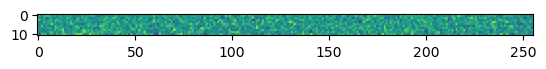

In [31]:
print(m.vit.embeddings_block.position_embeddings.shape)
print(m.vit.embeddings_block.position_embeddings)
plt.imshow(m.vit.embeddings_block.position_embeddings[0].detach().cpu().numpy())
plt.show()

In [ ]:
a = torch.rand(1,5,8)
self_attn = nn.MultiheadAttention(8, 8, dropout=0.1)
atten , src = self_attn(a  , a, a)

print(atten.shape) 	# ([20, 5, 256])
print(src.shape) 	# ([5, 20, 20])
plt.imshow(src[0].detach().cpu().numpy())
plt.show()

plt.imshow(atten.permute(1,0,2)[0].detach().cpu().numpy())
plt.show()

print(atten)
print(src)

In [ ]:
save_path = create_folder( os.path.join(os.getcwd() , "output" , "checkpoints"))
save_file = os.path.join(save_path , "detr_v1_d20_e50.pth")
torch.save(m , save_file)

In [ ]:
#a = torch.rand(1,5,8)
a = torch.arange(80.0).view(2,5,8)
n = nn.Linear(8,2)
n.bias.data.fill_(1)
n.weight.data.fill_(1)

print(n.weight.shape)
print(n.bias)
b =n(a)
print(a)
print(b.shape)
print(b)

In [ ]:
a= torch.rand(20,2)
b = torch.rand(20)*2
b = b.to(torch.long).view(-1,1)
#c = a[b]
c= torch.gather(a,1,b)
print(c.shape)
print(a)
print(b)
print()
print(c)

In [ ]:
decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8)
transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=6)
memory = torch.rand(10, 32, 512)
tgt = torch.rand(20, 32, 512)
out = transformer_decoder(tgt, memory)
print(out.shape)

In [ ]:
import torch
horizon_path =r"D:/OneDrive/OneDrive - NTHU/Layout/Horizon/0912_all_bk.pth"
#models_dict = torch.load_s
checkpoint = torch.load(horizon_path ,  map_location="cpu")
print(checkpoint['state_dict'].keys())
#model.load_state_dict(checkpoint['model_state_dict'])
pretrained_dict = {k: v for k, v in checkpoint['state_dict'].items() if k in m.state_dict()}
m.load_state_dict(pretrained_dict , strict=False)

In [ ]:
a= torch.rand(2,256 ,1024)
b = nn.Conv1d(256 , 64 , kernel_size=3 ,padding=1)
c = b(a)
print(c.shape)


In [ ]:
a = torch.rand(2,5,2)
print(a)
b=  nn.MaxPool2d((5,1))
c = b(a)
print(c.shape)
print(c)

In [ ]:
a = torch.rand(200).view(2,100,1)
#aa = a[:,:,0].unsqueeze(0)
#print(aa.shape)
b = F.interpolate(a.view(2,-1).unsqueeze(0), 10 )[0]
print(b.shape)

In [ ]:
a = torch.rand(2,10,1)
b = torch.cat([a,a] , dim=1)
print(b.shape)

In [ ]:
#a = torch.rand(2,100,1)
a = torch.arange(400).view(2,100,2)
b = torch.arange(20).view(2,10)

print(a)
print(b)
b= b.unsqueeze(-1).repeat(1,1,2)
print(b)
#print("b unsqueeze",b.unsqueeze(-1))

c = a.gather(1, b)
print(c.shape)
print(c)


In [ ]:
a=torch.arange(5)
b=torch.arange(5)
c=torch.arange(5)

d = torch.vstack([a,b,c]).permute(1,0)
print(d)


In [ ]:
from scipy.optimize import linear_sum_assignment
a = torch.tensor([ [0,1,2]  ,  [0,3,5] , [1,0,5] ]).to(torch.float32)
b = torch.tensor([ [0,1,2] , [1,0,5] ]).to(torch.float32)

cost = torch.cdist(b,a)
print(cost)
row , col = linear_sum_assignment(cost,)
print(row)
print(col)

In [ ]:
x = torch.tensor([[0.7605, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7730, 0.5752, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7057, 0.5861, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.8386, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.8304, 0.7823, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7034, 0.5994, 0.5691, 0.5652, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.6996, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.8305, 0.7819, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.8238, 0.7839, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
# Get the indices of non-zero elements
non_zero_indices = torch.nonzero(x)
print(non_zero_indices)
# Get the non-zero values
non_zero_values = x[non_zero_indices[:,0], non_zero_indices[:,1]]

unique = torch.unique(non_zero_indices[:,0] ,return_counts=True)
print("unique" , unique)
# Print the result
print(non_zero_values)
non_zero_values = torch.split(non_zero_values , tuple(unique[1]))
print("split non_zero_values" , non_zero_values)

def unpad_data( x :[Tensor] ) :
	non_zero_indices = torch.nonzero(x)
	print(non_zero_indices)
	# Get the non-zero values
	non_zero_values = x[non_zero_indices[:,0], non_zero_indices[:,1]]

	unique = torch.unique(non_zero_indices[:,0] ,return_counts=True)
	print("unique" , unique)
	# Print the result
	print(non_zero_values)
	non_zero_values = torch.split(non_zero_values , tuple(unique[1]))
	print("split non_zero_values" , non_zero_values)
	return non_zero_values

In [ ]:
a = torch.tensor([[0.58 , 0.6] , [0.4] ] , )
b = torch.tensor([0.1 , 0.2] , )

c = a.repeat(2)
print(a.repeat(2))

In [ ]:
transformer_model = nn.Transformer(nhead=16, num_encoder_layers=12)
src = torch.rand((10, 32, 512))
tgt = torch.rand((20, 32, 512))
out = transformer_model(src, tgt)

print(out.shape)

In [ ]:
import torch

print(torch.rand(1)[0])